In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

output_aCM.csv		output_FCHL.csv		 output_SLATM.csv
output_amons_aCM.csv	output_FCHL_global.csv	 output_SLATM_global.csv
output_amons_FCHL.csv	output_global_CM.csv	 output_SOAP.csv
output_amons_SLATM.csv	output_global_FCHL.csv	 output_SOAP_global.csv
output_amons_SOAP.csv	output_global_SLATM.csv  output_SPAHM_global.csv
output_CM_global.csv	output_global_SPAHM.csv


In [4]:
slatm_out = pd.read_csv("../out/output_SLATM_global.csv", index_col=0)

In [5]:
slatm_out

,SolN,Fragments,ObjValNoPen,ObjValWithPen
0,1,"['frag_07_c00001', 'frag_15_c00001']",140.609099,140.609099
1,2,"['frag_03_c00001', 'frag_08_c00001', 'frag_11_...",146.361365,146.361365
2,3,"['frag_04_c00001', 'frag_07_c00001', 'frag_11_...",146.839641,146.839641
3,4,"['frag_11_c00001', 'frag_13_c00001']",147.690856,147.690856
4,5,"['frag_03_c00001', 'frag_04_c00001', 'frag_06_...",149.886603,149.886603
...,...,...,...,...
995,996,"['frag_05_c00001', 'frag_07_c00001', 'frag_08_...",804.416700,844.416700
996,997,"['frag_02_c00001', 'frag_05_c00001', 'frag_09_...",825.212421,845.212421
997,998,"['frag_01_c00001', 'frag_08_c00001', 'frag_09_...",805.541841,845.541841
998,999,"['frag_02_c00001', 'frag_03_c00001', 'frag_11_...",806.209268,846.209268


In [6]:
from ast import literal_eval 

In [7]:
slatm_out["Fragments"] = slatm_out["Fragments"].apply(literal_eval)

In [8]:
slatm_out["Sorted Fragments"] = slatm_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(slatm_out["Sorted Fragments"]))

1000

In [10]:
# excess is missing Hs - to fix 

In [11]:
import qml

In [12]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [13]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [14]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [15]:
qm9_counts = count_ncharges(qm9_ncharges)

In [16]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [17]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../amons-qm9/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    diff_count = np.array(diff_count).astype(int)
    excess = []
    for i, count in enumerate(diff_count): 
        ncharge = [1,6,7,8,16][i]
        if count > 0 :
            for i in range(count):
                excess.append(ncharge)
        elif count < 0:
            for i in range(abs(count)):
                excess.append(-ncharge)
    return excess

In [18]:
slatm_out["Excess"] = slatm_out["Fragments"].apply(get_excess_frags)

In [19]:
slatm_out

,SolN,Fragments,ObjValNoPen,ObjValWithPen,Sorted Fragments,Excess
0,1,"[frag_07_c00001, frag_15_c00001]",140.609099,140.609099,"[frag_07_c00001, frag_15_c00001]","[1, 1, 1, 1, 1, 6, 7]"
1,2,"[frag_03_c00001, frag_08_c00001, frag_11_c00001]",146.361365,146.361365,"[frag_03_c00001, frag_08_c00001, frag_11_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"
2,3,"[frag_04_c00001, frag_07_c00001, frag_11_c00001]",146.839641,146.839641,"[frag_04_c00001, frag_07_c00001, frag_11_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"
3,4,"[frag_11_c00001, frag_13_c00001]",147.690856,147.690856,"[frag_11_c00001, frag_13_c00001]","[1, 1, 1, 1, 1, 6, 7]"
4,5,"[frag_03_c00001, frag_04_c00001, frag_06_c0000...",149.886603,149.886603,"[frag_03_c00001, frag_04_c00001, frag_06_c0000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 7]"
...,...,...,...,...,...,...
995,996,"[frag_05_c00001, frag_07_c00001, frag_08_c0000...",804.416700,844.416700,"[frag_05_c00001, frag_07_c00001, frag_08_c0000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, ..."
996,997,"[frag_02_c00001, frag_05_c00001, frag_09_c0000...",825.212421,845.212421,"[frag_02_c00001, frag_05_c00001, frag_09_c0000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, ..."
997,998,"[frag_01_c00001, frag_08_c00001, frag_09_c0000...",805.541841,845.541841,"[frag_01_c00001, frag_08_c00001, frag_09_c0000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, ..."
998,999,"[frag_02_c00001, frag_03_c00001, frag_11_c0000...",806.209268,846.209268,"[frag_02_c00001, frag_03_c00001, frag_11_c0000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, ..."


In [20]:
slatm_out.sort_values(by="ObjValWithPen").iloc[0:50]

,SolN,Fragments,ObjValNoPen,ObjValWithPen,Sorted Fragments,Excess
0,1,"[frag_07_c00001, frag_15_c00001]",140.609099,140.609099,"[frag_07_c00001, frag_15_c00001]","[1, 1, 1, 1, 1, 6, 7]"
1,2,"[frag_03_c00001, frag_08_c00001, frag_11_c00001]",146.361365,146.361365,"[frag_03_c00001, frag_08_c00001, frag_11_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"
2,3,"[frag_04_c00001, frag_07_c00001, frag_11_c00001]",146.839641,146.839641,"[frag_04_c00001, frag_07_c00001, frag_11_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"
3,4,"[frag_11_c00001, frag_13_c00001]",147.690856,147.690856,"[frag_11_c00001, frag_13_c00001]","[1, 1, 1, 1, 1, 6, 7]"
4,5,"[frag_03_c00001, frag_04_c00001, frag_06_c0000...",149.886603,149.886603,"[frag_03_c00001, frag_04_c00001, frag_06_c0000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 7]"
5,6,"[frag_04_c00001, frag_06_c00001, frag_13_c00001]",151.568664,151.568664,"[frag_04_c00001, frag_06_c00001, frag_13_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"
6,7,"[frag_05_c00001, frag_07_c00001, frag_08_c00001]",153.299608,153.299608,"[frag_05_c00001, frag_07_c00001, frag_08_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"
7,8,"[frag_01_c00001, frag_04_c00001, frag_07_c0000...",153.351929,153.351929,"[frag_01_c00001, frag_04_c00001, frag_07_c0000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 7]"
8,9,"[frag_03_c00001, frag_06_c00001, frag_14_c00001]",153.499430,153.499430,"[frag_03_c00001, frag_06_c00001, frag_14_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"
9,10,"[frag_06_c00001, frag_08_c00001, frag_10_c00001]",155.523528,155.523528,"[frag_06_c00001, frag_08_c00001, frag_10_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, 7]"


In [39]:
import matplotlib.pyplot as plt
import matplotlib

In [40]:
matplotlib.rcParams.update({'font.size': 12})

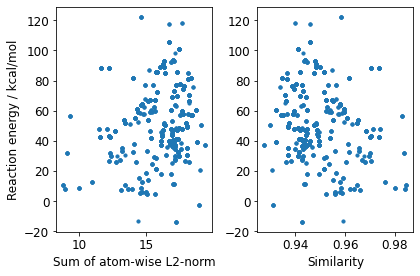

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(slatm_out["ObjValNoPen"]), slatm_out["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-slatm_out["ObjValNoPen"]/(2*50**2))
ax[1].scatter(x, slatm_out["energies / kcal/mol"], s=10)
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-amons-slatm-global.png", dpi=300)
plt.show()